import the required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv('Crop_recommendation.csv')

df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


outlier identification, feature selection = data preprocessing

In [2]:
df=df.drop(['N','P','K'],axis='columns')
df.head(3)

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice


In [3]:
df.isna().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

data selection

In [4]:
X=df.drop(['label'],axis='columns')
y=df.label

In [5]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

data scaling

In [6]:
X_Scaled=Scaler.fit_transform(X)
X_Scaled

array([[-0.93558693,  0.47266646,  0.04330173,  1.8103605 ],
       [-0.75964603,  0.39705125,  0.73487256,  2.24205791],
       [-0.51589814,  0.48695381,  1.77151047,  2.92106603],
       ...,
       [-0.29321843, -0.19123516, -0.13812031,  1.27141766],
       [ 0.12961223, -0.86951801,  0.37390383,  0.43154519],
       [-0.39766703, -0.49802006,  0.40109573,  0.68200518]])

In [7]:
print(len(X),len(y))

2200 2200


In [8]:
X.shape

(2200, 4)

In [9]:
X.describe()

,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,25.616244,71.481779,6.469480,103.463655
std,5.063749,22.263812,0.773938,54.958389
min,8.825675,14.258040,3.504752,20.211267
25%,22.769375,60.261953,5.971693,64.551686
50%,25.598693,80.473146,6.425045,94.867624
75%,28.561654,89.948771,6.923643,124.267508
max,43.675493,99.981876,9.935091,298.560117


data splitting

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.25,stratify=y,random_state=20,shuffle=True)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=20,shuffle=True)

In [12]:
print(len(X_train),len(y_test))

1650 550


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
#model=LogisticRegression()
#model=SVC()
#model=KNeighborsClassifier()
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
print("Random Forest:",model.score(X_train,y_train),"\n","Decision Tree:",model2.score(X_train,y_train))
print("Random Forest:",model.score(X_test,y_test),"\n","Decision Tree:",model2.score(X_test,y_test))

Random Forest: 1.0 
 Decision Tree: 1.0
Random Forest: 0.96 
 Decision Tree: 0.94


In [32]:
from sklearn.metrics  import accuracy_score
y_predicted=model.predict(X_test)
y_predicted[:6]
accuracyscore=accuracy_score(y_test,y_predicted)
accuracyscore

0.96

In [33]:
from sklearn.metrics  import accuracy_score
y_predicted2=model2.predict(X_test)
y_predicted2[:6]
accuracyscore2=accuracy_score(y_test,y_predicted2)
accuracyscore2

0.94

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  3,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3, 22,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,

In [35]:
cm2=confusion_matrix(y_test,y_predicted2)
cm2

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  7,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 23,  1,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 24,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 24,  0,  0,

Text(95.72222222222221, 0.5, 'Truth')

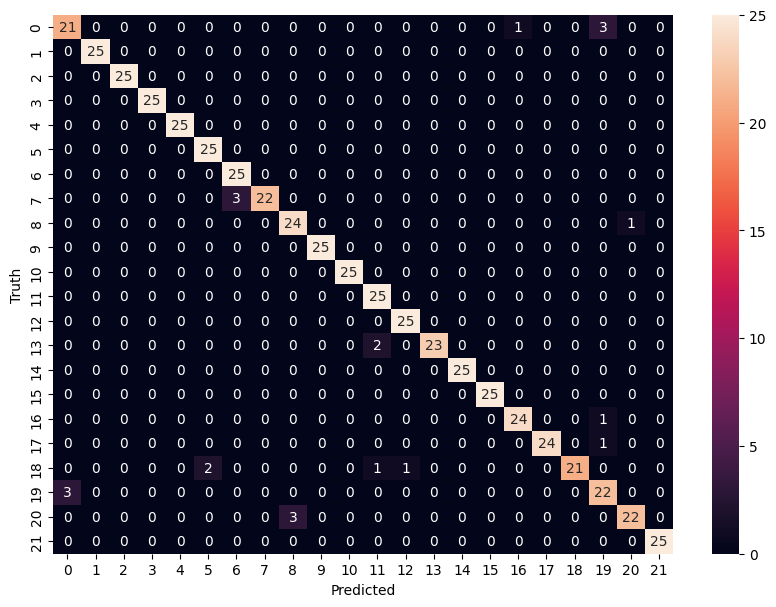

In [36]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

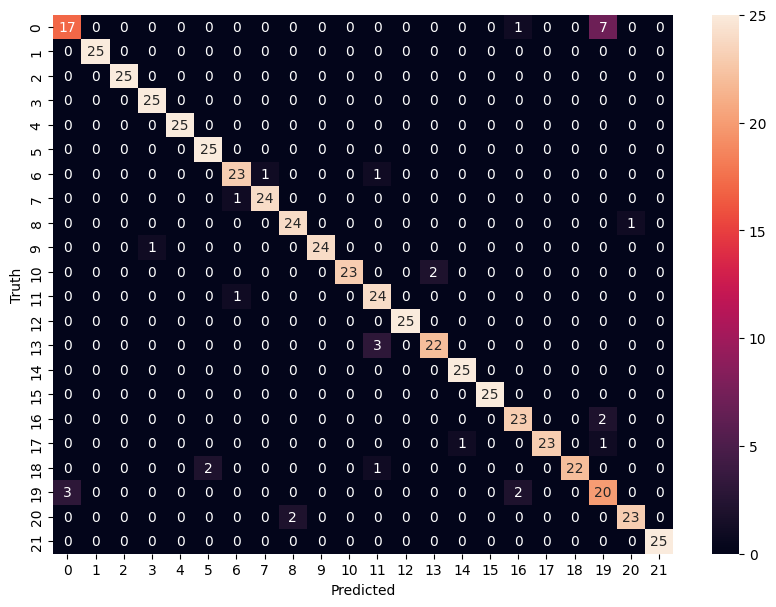

In [37]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_test,y_test,cv=5)
scores.mean()

0.9381818181818182

In [39]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2,X_test,y_test,cv=5)
scores.mean()

0.8527272727272728

In [40]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

1650 550 1650 550


In [42]:
print(y_test[525:531])

7              rice
679        mungbean
191           maize
1169          mango
2102         coffee
927     pomegranate
Name: label, dtype: object


In [43]:
res=model.predict([[29.21780035, 87.93724219,6.54450214,43.1386631]])
sol=res[0]

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
res2=model2.predict([[29.21780035, 87.93724219,6.54450214,43.1386631]])
sol2=res2[0]

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
print("Random Forest:",sol)
print("Decision Tree:",sol2)

Random Forest: mungbean
Decision Tree: mungbean


In [46]:
y_test.value_counts()

label
lentil         25
grapes         25
mungbean       25
mothbeans      25
cotton         25
rice           25
pigeonpeas     25
banana         25
coconut        25
pomegranate    25
kidneybeans    25
blackgram      25
mango          25
coffee         25
papaya         25
orange         25
watermelon     25
jute           25
chickpea       25
maize          25
apple          25
muskmelon      25
Name: count, dtype: int64

In [61]:
import pickle
with open('Crop recommendation.pkl','wb') as file:
    pickle.dump(model,file)

In [62]:
import pickle
with open('Crop recommendation2.pkl','wb') as file:
    pickle.dump(model2,file)

In [64]:
with open('Crop recommendation.pkl','rb') as file:
    loaded_model1=pickle.load(file)

In [65]:
with open('Crop recommendation2.pkl','rb') as file:
    loaded_model2=pickle.load(file)

In [68]:
ans=loaded_model2.predict([[29.21780035, 87.93724219,6.54450214,43.1386631]])
ans[0]

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'mungbean'